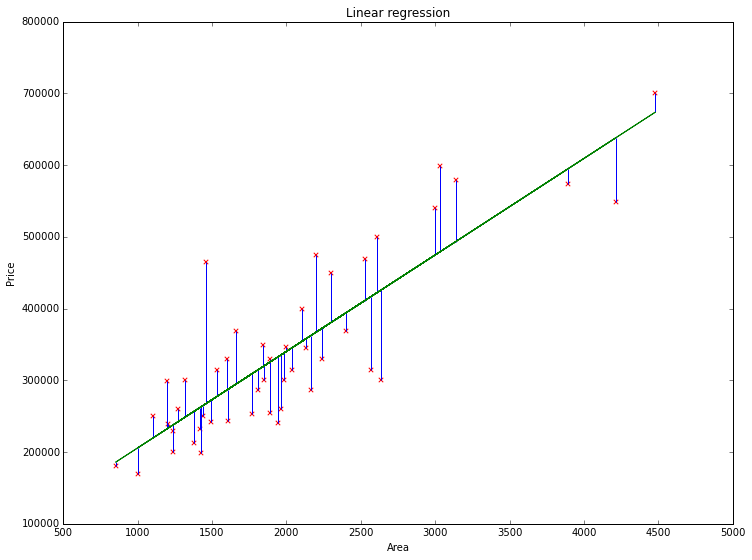

In [1]:
import numpy as np
from numpy import linalg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
#matplotlib.style.use('ggplot')
%matplotlib inline

fx = open("C:/AA/datayes/ex3Data/ex3x.dat")
fy = open("C:/AA/datayes/ex3Data/ex3y.dat")
X = np.array([x.rstrip().split() for x in fx.readlines()], dtype=float)
Y = np.array([y.rstrip().split() for y in fy.readlines()], dtype=float)

fx.close()
fy.close()

X = np.matrix(X)
Y = np.matrix(Y)

#W = linalg.inv(X.T * X) * X.T * Y
X1 = np.column_stack((np.ones((len(X), 1)), X[:, 0]))
W = linalg.pinv(X1) * Y

Y2 = np.multiply(np.tile(W[1], len(X)) , X[:, 0].T) + np.tile(W[0], len(X))

Y2 = np.array(Y2)[0]

lines = [[(X[i, 0], Y[i][0,0]), (X[i, 0], Y2[i])] for i in range(0, len(X))]

plt.figure(figsize=(12,9))

lc = mc.LineCollection(lines)
fig, ax = plt.subplots(figsize=(12,9))
ax.add_collection(lc)
ax.autoscale()

plt.scatter(X[:,0], Y, marker=u'x', color='r')

plt.plot(X[:, 0], Y2, color='g')

#ax.margins(0.1)
plt.title("Linear regression")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()



# Gradient Descent for linear regression

In [34]:
import numpy as np
def SSE(X, w, t):
    return np.sum(np.square(X * w - t))

def MSE(X, w, t):
    """Compute mean square error"""
    return SSE(X,w,t) / len(t)

def GD(X, w, t, ita):
    """Compute the gradient"""
    
    

In [49]:
# X.T * (X1 * W - Y)
#xmin, xmax = (np.min(X1[:,1]), np.max(X1[:,1]))

W

matrix([[ 71270.49244873],
        [   134.52528772]])

# MSE Contour plot

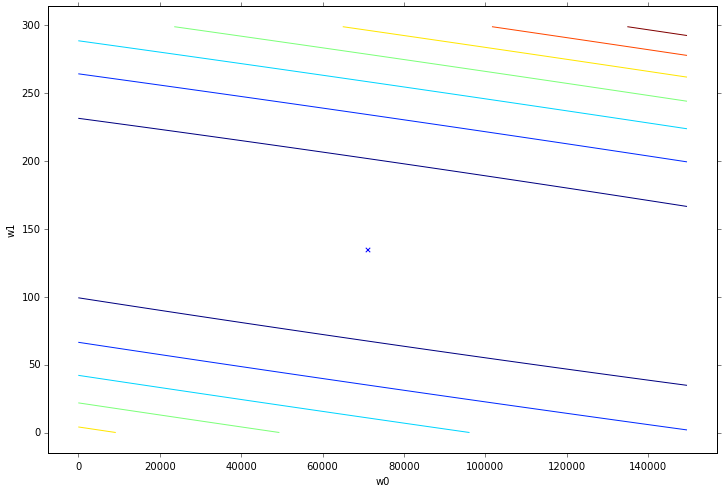

In [99]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.interpolate
%matplotlib inline

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta0 = 500.
delta1 = 1
num = 300

w0 = np.arange(0, num * delta0, delta0)
w1 = np.arange(0, num * delta1, delta1)
x0 = X1[:,0]
x1 = X1[:,1]
#mse = [np.sum(np.square(w0[i] * x0 + w1[i] * x1 - Y))/len(x0) for i in range(0, num)]
#mse = np.square()/len(x0)

W0, W1 = np.meshgrid(w0, w1)

@np.vectorize
def mse2(x,y):
    # some arbitrary function
    return np.sum(np.square(x * x0 + y * x1 - Y))/len(x0)

#E = scipy.interpolate.griddata((w0, w1), mse, (W0, W1), method = "linear" )
E = mse2(W0, W1)  
plt.figure(figsize=(12,8))
#plt.imshow(E, vmin=E.min(), vmax=E.max(), origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
#w=np.squeeze(np.asarray(W))
plt.scatter(w[0], w[1], marker='x')
#plt.colorbar()
plt.contour(W0, W1, E)
plt.xlabel('w0')
plt.ylabel('w1')
plt.show()
    
    
    



In [84]:
E.min()
np.squeeze(np.asarray(W))


array([ 71270.49244873,    134.52528772])

In [75]:
mse2(W0, W1)
mse
E

array([[  1.31183096e+11,   1.24474843e+11,   1.17966590e+11,
          1.11658337e+11,   1.05550083e+11,   9.96418303e+10,
          9.39335771e+10,   8.84253239e+10,   8.31170707e+10,
          7.80088175e+10],
       [  1.02463066e+11,   9.65550856e+10,   9.08471048e+10,
          8.53391239e+10,   8.00311431e+10,   7.49231622e+10,
          7.00151813e+10,   6.53072005e+10,   6.07992196e+10,
          5.64912388e+10],
       [  7.74397074e+10,   7.23319989e+10,   6.74242904e+10,
          6.27165819e+10,   5.82088734e+10,   5.39011649e+10,
          4.97934564e+10,   4.58857479e+10,   4.21780394e+10,
          3.86703308e+10],
       [  5.61130192e+10,   5.18055830e+10,   4.76981468e+10,
          4.37907107e+10,   4.00832745e+10,   3.65758383e+10,
          3.32684021e+10,   3.01609660e+10,   2.72535298e+10,
          2.45460936e+10],
       [  3.84830016e+10,   3.49758378e+10,   3.16686740e+10,
          2.85615101e+10,   2.56543463e+10,   2.29471825e+10,
          2.04400186e+10

# MSE 3D plot

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
%matplotlib inline
def error(m, b, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

x = y = np.arange(-3.0, 3.0, 0.05)
Point = collections.namedtuple('Point', ['x', 'y'])

m, b = 3, 2
noise = np.random.random(x.size)
points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(2.0, 4.0, 10)
bs = np.linspace(1.5, 2.5, 10)

M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('error')

plt.show()

# Stochastic Gradient Descent 

In [ ]:
import numpy as np


# Ploynomial Basis Expansion 
+ Ploynomial Curve fitting problem

# Error space view

In [102]:
#np.column_stack(np.ones(( len(X), 1)), X[:, 0])
t1 = np.ones((len(X), 1))
x1 = X[:, 0]
W

matrix([[ 71270.49244873],
        [   134.52528772]])

In [124]:
#w2 = np.polyfit(X[:,0], Y, 1)
x1 = np.array(X[:,0].T)[0]
w2 = np.polyfit(x1, Y, 1)
np.multiply(np.tile(W[1], 47) , X[:, 0].T)
np.array(Y2)[0]

array([ 354311.69781212,  286510.95280112,  394131.18297731,
        261758.29986059,  474846.35560945,  338303.18857341,
        277632.28381158,  263238.07802551,  256915.38950266,
        272251.27230277,  332249.550626  ,  340321.06788921,
        325523.28623999,  673674.73085997,  241848.55727799,
        380678.65420528,  248843.87223945,  237543.74807095,
        422246.96811084,  479016.63952878,  308976.6758504 ,
        325254.23566454,  287049.053952  ,  335209.10695584,
        594573.86168047,  219248.30894099,  267408.36194484,
        411081.36923006,  367226.12543326,  426013.67616701,
        318662.49656625,  205795.78016897,  345702.07939802,
        493276.32002713,  314895.78851009,  264583.33090272,
        237947.32393411,  358078.40586828,  638294.58018955,
        362114.16449989,  295120.57121521,  372338.08636663,
        416596.90602659,  232700.83771302,  185886.03758637,
        320411.32530662,  233104.41357618])

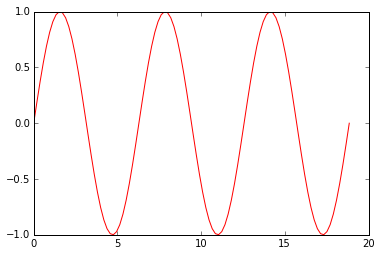

In [133]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()

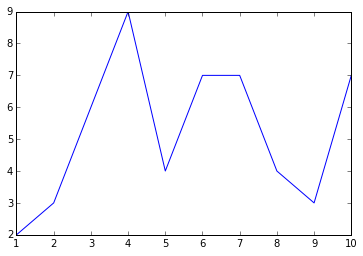

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("C:/AA/datayes/sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [148]:
%pylab inline
from tempfile import NamedTemporaryFile
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            print(f.name)
            FFwriter = animation.FFMpegWriter()
            name = "C:/Temp/test.mp4"
            anim.save(name, writer = FFwriter, fps=30, extra_args=['-vcodec', 'libx264'])
            video = open(name, "rb").read()
        anim._encoded_video = video.encode("base64")
        
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))


from matplotlib import animation
plt.rcParams['animation.ffmpeg_path'] = 'C:/TOOLS/ffmpeg/bin/ffmpeg.exe'
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

Populating the interactive namespace from numpy and matplotlib
C:\Users\wanghuaq\AppData\Local\Temp\tmp5z_vgb2j.mp4


AttributeError: 'bytes' object has no attribute 'encode'

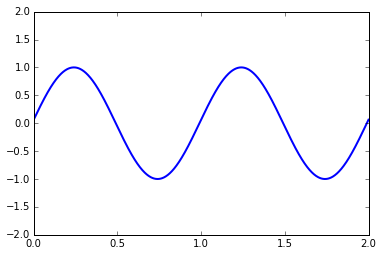

In [158]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import base64
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/TOOLS/ffmpeg/bin/ffmpeg.exe'

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

FFwriter = animation.FFMpegWriter()
anim.save('C:/Temp/basic_animation.mp4', writer = FFwriter, fps=30, extra_args=['-vcodec', 'libx264'])


video = open('C:/Temp/basic_animation.mp4', "rb").read()
encoded = base64.b64encode(video)

HTML("""
<video width="320" height="240" controls>
  <source src="C:/Temp/basic_animation.mp4" type="video/mp4">
</video>
""")


In [165]:
#lines = [[(X[i, 0], Y[i][0,0]), (X[i, 0], Y2[i])] for i in range(0, len(X))]
#lines

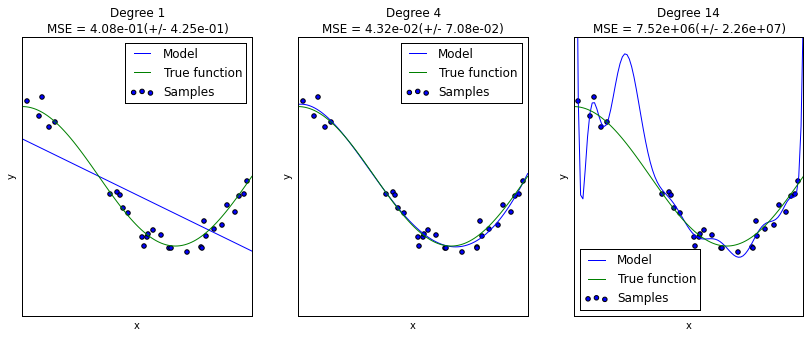

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
%matplotlib inline
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 14]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Test with different lambda (Ridge)

lambda:  3.05902320502e-07
-1.98379901143
-3.1497641344
-5.00524245565
5.99494076396
7.7817423689
-0.221649306649
-3.36635734739
0.45516414256
4.29177802962
2.31637859683
-5.160286794
-11.8455396871
-7.98047037872
16.9008155265
lambda:  2.71828182846
-0.722864782311
-0.428023193645
-0.199106350736
-0.0577896402943
0.0272994811466
0.0783506703075
0.108694512253
0.126248505624
0.135778766924
0.140207963559
0.141363362206
0.140409165062
0.138100335228
0.134934247956
lambda:  0.0
-1251.8480719
41243.5022515
-692175.158499
6890025.89224
-44221637.9559
192759811.776
-589424697.927
1287090243.2
-2017591630.08
2252831479.28
-1748682829.79
896643896.592
-273024787.342
37382298.0519


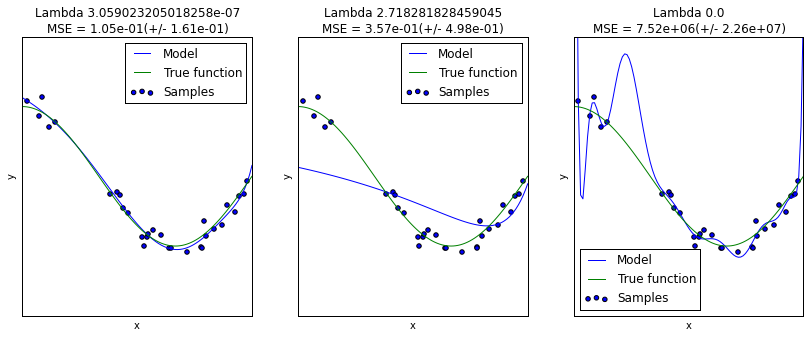

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import cross_validation
%matplotlib inline
np.random.seed(0)

n_samples = 30
#degrees = [1, 4, 14]
l = [-15, 1,  -1000000]
lambdas = np.exp(l)
degree = 14

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(lambdas)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = Ridge(alpha=lambdas[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    print("lambda: ", lambdas[i])
    [print(x) for x in linear_regression.coef_]
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Lambda {}\nMSE = {:.2e}(+/- {:.2e})".format(
        lambdas[i], -scores.mean(), scores.std()))
plt.show()

# Test with different lambdas (Lasso)

C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number o

lambda:  3.05902320502e-07
-0.799962199042
-8.85782704873
3.52160849312
5.06372536392
3.15646009011
0.89805447502
-0.658503984575
-1.58092226704
-1.78526925165
-1.50552560872
-0.899284024856
-0.0882318291747
0.704336846102
1.81611989873
lambda:  0.000911881965555
-4.13850686079
-0.0
0.0
1.98476371521
1.01599035911
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
lambda:  2.71828182846
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0


C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\TOOLS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


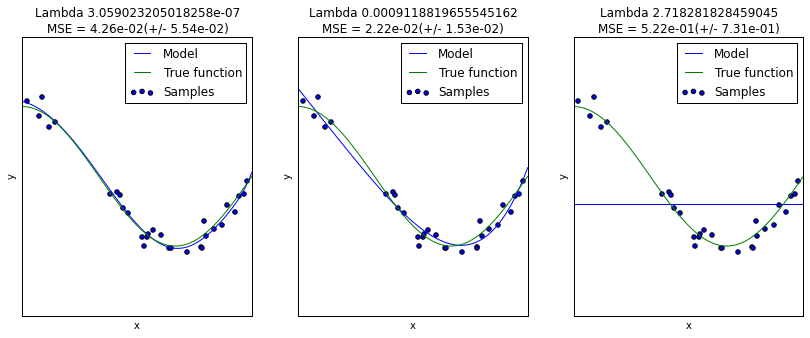

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn import cross_validation
%matplotlib inline
np.random.seed(0)

n_samples = 30
#degrees = [1, 4, 14]
l = [-15,-7, 1]
lambdas = np.exp(l)
degree = 14

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(lambdas)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = Lasso(alpha=lambdas[i], max_iter=10000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    print("lambda: ", lambdas[i])
    [print(x) for x in linear_regression.coef_]
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Lambda {}\nMSE = {:.2e}(+/- {:.2e})".format(
        lambdas[i], -scores.mean(), scores.std()))
plt.show()

In [144]:
l = range(-18, 0)
np.exp(l)
linear_regression = LinearRegression()
linear_regression.set_params


from sklearn.linear_model import Lasso


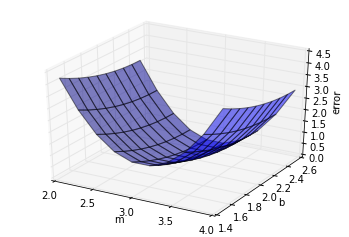

In [43]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
%matplotlib inline
def error(m, b, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

x = y = np.arange(-3.0, 3.0, 0.05)
Point = collections.namedtuple('Point', ['x', 'y'])

m, b = 3, 2
noise = np.random.random(x.size)
points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(2.0, 4.0, 10)
bs = np.linspace(1.5, 2.5, 10)

M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')

plt.show()

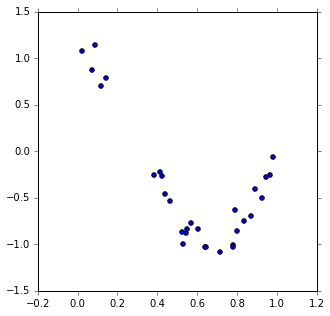

'\nfor i in range(len(degrees)):\n    ax = plt.subplot(1, len(degrees), i + 1)\n    plt.setp(ax, xticks=(), yticks=())\n\n    polynomial_features = PolynomialFeatures(degree=degrees[i],\n                                             include_bias=False)\n    linear_regression = LinearRegression()\n    pipeline = Pipeline([("polynomial_features", polynomial_features),\n                         ("linear_regression", linear_regression)])\n    pipeline.fit(X[:, np.newaxis], y)\n\n    # Evaluate the models using crossvalidation\n    scores = cross_validation.cross_val_score(pipeline,\n        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)\n\n    X_test = np.linspace(0, 1, 100)\n    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")\n    plt.plot(X_test, true_fun(X_test), label="True function")\n    plt.scatter(X, y, label="Samples")\n    plt.xlabel("x")\n    plt.ylabel("y")\n    plt.xlim((0, 1))\n    plt.ylim((-2, 2))\n    plt.legend(loc="best")\n    plt.title

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
%matplotlib inline
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(5, 5))
plt.scatter(X, y, label="Samples")
plt.show()
"""
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

"""

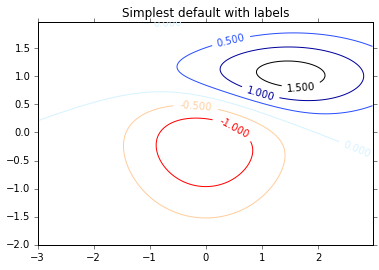

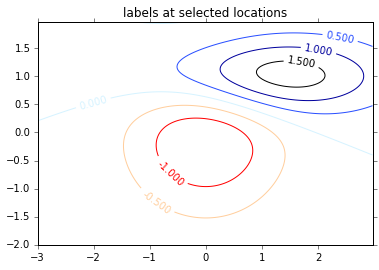

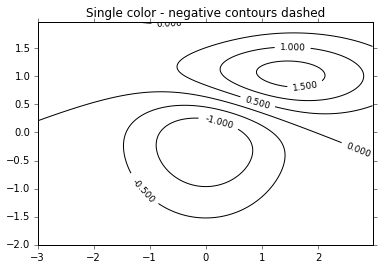

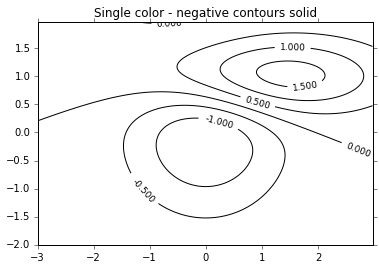

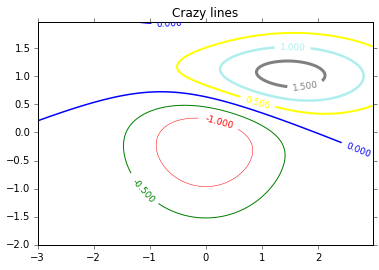

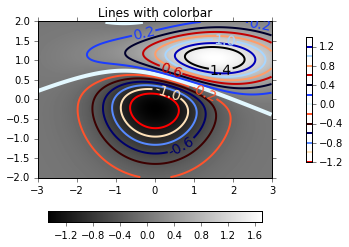

In [166]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)



# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k', # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k', # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1,1,0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3,3,-2,2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3,3,-2,2))

#Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l,b,w,h = plt.gca().get_position().bounds
ll,bb,ww,hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b+0.1*h, ww, h*0.8])


plt.show()

# Elastic net

+ test

$$1 / (2 * n_samples) * ||y - Xw||^2_2 +
+ alpha * l1_{ratio} * ||w||_1
+ 0.5 * alpha * (1 - l1_{ratio}) * ||w||^2_2$$

SyntaxError: invalid syntax (<ipython-input-167-82a604c666d4>, line 1)